<a href="https://colab.research.google.com/github/karthikmohan1702/EVA6/blob/main/S11_YOLO_V3/yolov3/YoloV3Sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import time
import glob
import torch
import os
from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.9.0+cu102 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


Cloning repo where Yolov3 resides & this repo is forked from https://github.com/theschoolofai/YoloV3 where you use your customized dataset on YOLOV3 model along with the step by step procedure of how to carry out it.

In [ ]:
!git clone https://github.com/karthikmohan1702/YoloV3.git

Cloning into 'YoloV3'...
remote: Enumerating objects: 7213, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 7213 (delta 1), reused 1 (delta 0), pack-reused 7201
Receiving objects: 100% (7213/7213), 263.50 MiB | 33.57 MiB/s, done.
Resolving deltas: 100% (22/22), done.
Checking out files: 100% (7462/7462), done.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
ls

gdrive/  sample_data/  YoloV3/


Weights are downloaded from this link https://drive.google.com/open?id=1LezFG5g3BCW6iYaV89B2i64cqEUZD7e0


In [ ]:
!mkdir YoloV3/weights
!cp /content/gdrive/MyDrive/ColabNotebooks/EVA_6/S11_YOLO/weights/yolov3-spp-ultralytics.pt YoloV3/weights/

In [ ]:
%cd YoloV3/

/content/YoloV3


In [ ]:
!ls

 annotation_tool   output	  results.txt	     train.py
 cfg		   __pycache__	  test_batch0.png   'ubdivisions=1'
 data		   README.md	  test.py	     utils
 detect.py	   results.json   ting		     vim.exe.stackdump
 models.py	   results.png	  train_batch0.png   weights


Perorming a sample run on the smallcoco data to check everything is working fine

In [ ]:
!python train.py --data data/smalcoco/smalcoco.data --batch 10 --cache --epochs 3 --nosave

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-spp.cfg', data='data/smalcoco/smalcoco.data', device='', epochs=3, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15109MB)

2021-07-26 17:35:15.932387: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:00<00:00, 2861.15it/s]
Caching images (0.0GB): 100% 20/20 [00:00<00:00, 114.34it/s]
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:00<00:00, 5990.58it/

Training it on the custom dataset

In [ ]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 10

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=10, evolve=False, img_size=[512], multi_scale=False, name='', nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15109MB)

2021-07-26 17:35:49.248789: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
Caching labels (2953 found, 131 missing, 38 empty, 0 duplicate, for 3122 images): 100% 3122/3122 [00:00<00:00, 6820.72it/s]
Caching images (1.8GB): 100% 3122/3122 [00:20<00:00, 151.16it/s]
Reading image shapes: 100% 328/328 [00:00<00:00, 4763.04it/s]
Caching labels (306 found, 1

In [ ]:
!python detect.py --conf-thres 0.3 --source "/content/YoloV3/data/custom_test_img" --output custom_test_op

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='custom_test_op', save_txt=False, source='/content/YoloV3/data/custom_test_img', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15109MB)

Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
image 1/16 /content/YoloV3/data/custom_test_img/eva6_1.jpg: 512x512 3 hardhats, 4 vests, Done. (0.045s

In [ ]:
ls custom_test_op/

eva6_10.jpg  eva6_13.jpg  eva6_16.jpg  eva6_3.jpg  eva6_6.jpg  eva6_9.jpg
eva6_11.jpg  eva6_14.jpg  eva6_1.jpg   eva6_4.jpg  eva6_7.jpg
eva6_12.jpg  eva6_15.jpg  eva6_2.jpg   eva6_5.jpg  eva6_8.jpg


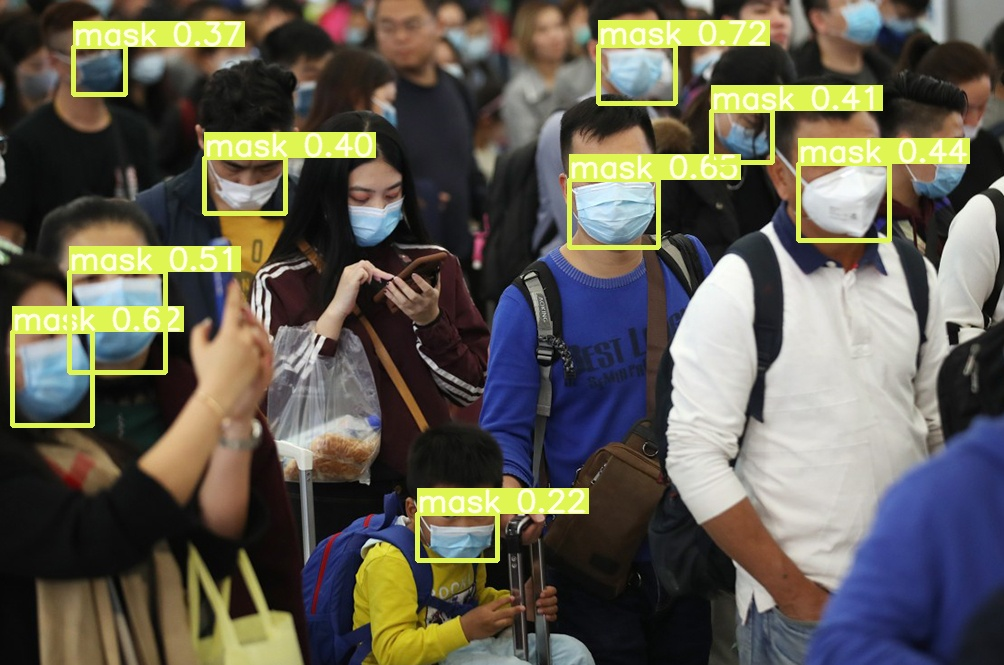

In [ ]:
Image(filename='custom_test_op/eva6_10.jpg', width=600)

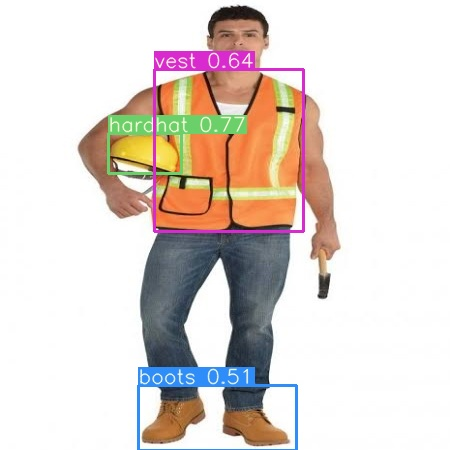

In [ ]:
Image(filename='custom_test_op/eva6_13.jpg', width=600)

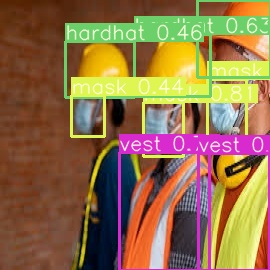

In [ ]:
Image(filename='custom_test_op/eva6_3.jpg', width=600)

In [ ]:
video = "/content/gdrive/MyDrive/ColabNotebooks/EVA_6/S11_YOLO/yolov3_test_vid.mp4"

In [ ]:
!mkdir frames
!ffmpeg -i "/content/gdrive/MyDrive/ColabNotebooks/EVA_6/S11_YOLO/yolov3_test_vid.mp4" "frames/out-%03d.jpg"

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [ ]:
ls frames

out-001.jpg  out-156.jpg  out-311.jpg  out-466.jpg  out-621.jpg  out-776.jpg
out-002.jpg  out-157.jpg  out-312.jpg  out-467.jpg  out-622.jpg  out-777.jpg
out-003.jpg  out-158.jpg  out-313.jpg  out-468.jpg  out-623.jpg  out-778.jpg
out-004.jpg  out-159.jpg  out-314.jpg  out-469.jpg  out-624.jpg  out-779.jpg
out-005.jpg  out-160.jpg  out-315.jpg  out-470.jpg  out-625.jpg  out-780.jpg
out-006.jpg  out-161.jpg  out-316.jpg  out-471.jpg  out-626.jpg  out-781.jpg
out-007.jpg  out-162.jpg  out-317.jpg  out-472.jpg  out-627.jpg  out-782.jpg
out-008.jpg  out-163.jpg  out-318.jpg  out-473.jpg  out-628.jpg  out-783.jpg
out-009.jpg  out-164.jpg  out-319.jpg  out-474.jpg  out-629.jpg  out-784.jpg
out-010.jpg  out-165.jpg  out-320.jpg  out-475.jpg  out-630.jpg  out-785.jpg
out-011.jpg  out-166.jpg  out-321.jpg  out-476.jpg  out-631.jpg  out-786.jpg
out-012.jpg  out-167.jpg  out-322.jpg  out-477.jpg  out-632.jpg  out-787.jpg
out-013.jpg  out-168.jpg  out-323.jpg  out-478.jpg  out-633.jpg  out-788.jpg

In [ ]:
ls

 annotation_tool/   models.py      results.txt        train.py
 cfg/               output/        runs/             'ubdivisions=1'
 custom_test_op/    __pycache__/   test_batch0.png    utils/
 data/              README.md      test.py            vim.exe.stackdump
 detect.py          results.json   ting               weights/
 frames/            results.png    train_batch0.png


In [ ]:
!python detect.py --conf-thres 0.3 --source frames/ --output frame_op/ 

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='frame_op/', save_txt=False, source='frames/', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15109MB)

Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
image 1/925 frames/out-001.jpg: 320x512 1 hardhats, 2 vests, Done. (0.033s)
image 2/925 frames/out-002.jpg: 320x512 1 hardhats, 2 vests,

In [ ]:
ls

 annotation_tool/   models.py      runs/              utils/
 cfg/               output/        test_batch0.png    video_op/
 custom_test_op/    __pycache__/   test.py            vim.exe.stackdump
 data/              README.md      ting               weights/
 detect.py          results.json   train_batch0.png
 frame_op/          results.png    train.py
 frames/            results.txt   'ubdivisions=1'


In [ ]:
# Combining all the output frames to form a video
!ffmpeg -i frame_op/out-%03d.jpg yolo_op.mp4

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [ ]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('yolo_op.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=800 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)